# Assignment-2
Due date: Feb. 27 

### Feedback:
- Not only the stocks, the index has to be different than the one used in class lecture. (-5)

#### Grades (95)

In this assignment, you are working at a hypothetical bank called `InvRes` Bank offering consulting service to its customers. Your first aim is to find out the risk level of these stocks relative to the market index.



To accomplish this task, you will use Capital Asset Pricing Model (CAPM), which dates back to 1960’s, yet still powerful tool in finance due to its intuitive and easy-to-apply nature. As it is completely white-box model, it makes it easy to understand and explain. 

Once you estimate the slope coefficient (beta) and intercept term (alpha) of the CAPM model, you will be able to assess if the asset is risky compared to market. Then, your next task is to find out the stock with best risk-return relationship. To do that, you are required to employ the following ratios:

• Sharpe ratio

• Treynor ratio

You can pick any two stocks and market index other than those we have in the class.

This assignment will be divided into 4 milestones.

1. Accessing the data and obtain daily risk-free rate. Besides, analyze data via summary statistic. (25 pts)

2. Examine the data through visualization and correlation. Calculate returns of the stocks and market. (25 pts)

3. Run Capital Asset Pricing Model and interpret the results. (25 pts)

4. Calculate Sharpe and Treynor measures. Compare and interpret the results and conclude. (25 pts)


# Install dependencies

In [61]:
!pip install yfinance
!pip install fredapi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Import libraries

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
import seaborn as sns
import warnings
import yfinance as yf
import seaborn as sns
from fredapi import Fred
import statsmodels.api as sm

# Accessing data and obtaining daily risk-free rate

## Daily stock price data

In [63]:
# Get closing stocks of Google and Amazon and a Market Index of S&P500
stocks = ['^GSPC', 'GOOGL', 'AMZN']
start = datetime.datetime(2021,1,1)   # start date
end = datetime.datetime(2021,8,1)     # end date
port = yf.download(stocks, start=start, end=end, interval='1d')['Close']

# Rename column
port = port.rename({'^GSPC':'GSPC'}, axis='columns')
port.head()

[*********************100%***********************]  3 of 3 completed


,AMZN,GOOGL,GSPC
Date,,,
2021-01-04,159.331497,86.306503,3700.649902
2021-01-05,160.925507,87.002502,3726.860107
2021-01-06,156.919006,86.143997,3748.139893
2021-01-07,158.108002,88.717003,3803.790039
2021-01-08,159.134995,89.891502,3824.679932


## Data analysis

In [64]:
# Check null values
port.isnull().sum()

AMZN     0
GOOGL    0
GSPC     0
dtype: int64

Stock prices has no null values

In [65]:
# Summary statistics
port.describe()

,AMZN,GOOGL,GSPC
count,145.000000,145.000000,145.000000
mean,165.079876,110.883972,4075.962417
std,9.020308,12.245352,199.156546
min,147.597504,86.143997,3700.649902
25%,158.294495,102.323502,3901.820068
50%,163.969498,113.123497,4128.799805
75%,170.000000,120.114998,4224.790039
max,186.570496,136.093994,4422.299805


array([[<AxesSubplot:title={'center':'AMZN'}>,
        <AxesSubplot:title={'center':'GOOGL'}>],
       [<AxesSubplot:title={'center':'GSPC'}>, <AxesSubplot:>]],
      dtype=object)

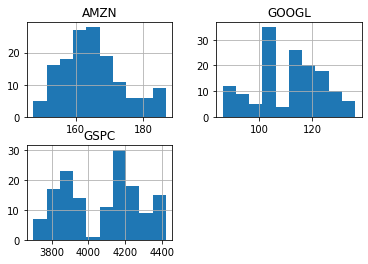

In [66]:
# Histogram of stocks prices
port.hist()

We have total 145 closing stock prices.
<br>Amazon has a mean of 165.08 and median of 163.97 dollars
<br>Google has a mean of 110.88 and median of 113.12 dollars

## Calculate Risk Free Rate

In [67]:
# Connect fred api and calculate the risk free rate 
fred = Fred(api_key='2fd222cbf44393649cff4b4beb4fc179')
fred.search('risk free').head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
DGS10,DGS10,2023-02-27,2023-02-27,Market Yield on U.S. Treasury Securities at 10...,1962-01-02,2023-02-24,Daily,D,Percent,%,Not Seasonally Adjusted,NSA,2023-02-27 15:22:03-06:00,92,For further information regarding treasury con...
GS10,GS10,2023-02-27,2023-02-27,Market Yield on U.S. Treasury Securities at 10...,1953-04-01,2023-01-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2023-02-01 15:21:11-06:00,73,Averages of business days. For further informa...
WGS10YR,WGS10YR,2023-02-27,2023-02-27,Market Yield on U.S. Treasury Securities at 10...,1962-01-05,2023-02-24,"Weekly, Ending Friday",W,Percent,%,Not Seasonally Adjusted,NSA,2023-02-27 15:18:02-06:00,54,Averages of business days. For further informa...
DGS2,DGS2,2023-02-27,2023-02-27,Market Yield on U.S. Treasury Securities at 2-...,1976-06-01,2023-02-24,Daily,D,Percent,%,Not Seasonally Adjusted,NSA,2023-02-27 15:22:07-06:00,81,For further information regarding treasury con...
DGS1,DGS1,2023-02-27,2023-02-27,Market Yield on U.S. Treasury Securities at 1-...,1962-01-02,2023-02-24,Daily,D,Percent,%,Not Seasonally Adjusted,NSA,2023-02-27 15:22:02-06:00,80,For further information regarding treasury con...


In [68]:
# Select 3-Month Treasury Constant Maturity Rate
risk_free = fred.get_series('DGS3MO')
risk_free = risk_free['2021-01-01':'2021-08-01']

# Drop null values
risk_free = risk_free.dropna()
risk_free

2021-01-04    0.09
2021-01-05    0.09
2021-01-06    0.09
2021-01-07    0.09
2021-01-08    0.08
              ... 
2021-07-26    0.05
2021-07-27    0.05
2021-07-28    0.05
2021-07-29    0.06
2021-07-30    0.06
Length: 146, dtype: float64

# Correlation and Stock/Market returns

## Stocks and market index trend

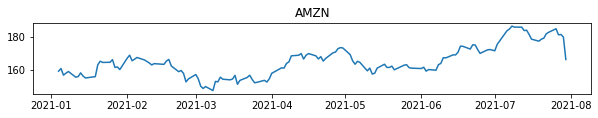

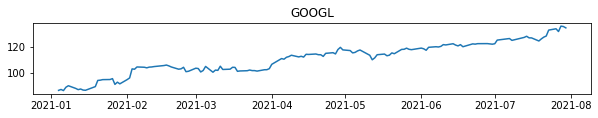

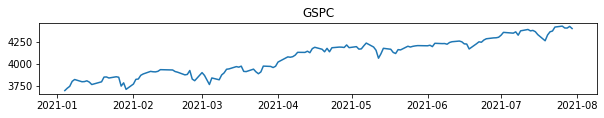

In [69]:
# Show trend of Amazon/Google stocks and MarketIndex
for i, stock in enumerate(port.columns, start=1):
    plt.figure(figsize=(10,6))
    plt.subplot(4, 1, i)
    plt.plot(port[stock])
    plt.title(f'{stock}')
    plt.show()

Google and MarketIndex (GSPC) trends to increase always and Amazon with ups and downs

## Correlation

In [70]:
# Correlation matrix
port.corr() 

,AMZN,GOOGL,GSPC
AMZN,1.000000,0.732543,0.752466
GOOGL,0.732543,1.000000,0.970346
GSPC,0.752466,0.970346,1.000000


## Calculate stock returns

In [71]:
returns = port.pct_change()
returns.dropna(inplace=True)
returns.head()

,AMZN,GOOGL,GSPC
Date,,,
2021-01-05,0.010004,0.008064,0.007083
2021-01-06,-0.024897,-0.009868,0.005710
2021-01-07,0.007577,0.029869,0.014847
2021-01-08,0.006496,0.013239,0.005492
2021-01-11,-0.021519,-0.023106,-0.006555


## Calculate excess returns

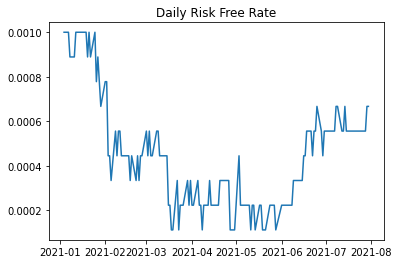

In [72]:
# Convert the 3-month risk-free rate into daily rate
risk_free = risk_free/90

# Plot daily risk free rate
plt.plot(risk_free)
plt.title('Daily Risk Free Rate')
plt.show()

In [73]:
# Subtract risk free rate from the stock returns
stocks = port.columns
for i in stocks:
    returns[f"excess_return_{i}"] = returns[i] - risk_free
returns.head()

,AMZN,GOOGL,GSPC,excess_return_AMZN,excess_return_GOOGL,excess_return_GSPC
Date,,,,,,
2021-01-05,0.010004,0.008064,0.007083,0.009004,0.007064,0.006083
2021-01-06,-0.024897,-0.009868,0.005710,-0.025897,-0.010868,0.004710
2021-01-07,0.007577,0.029869,0.014847,0.006577,0.028869,0.013847
2021-01-08,0.006496,0.013239,0.005492,0.005607,0.012350,0.004603
2021-01-11,-0.021519,-0.023106,-0.006555,-0.022408,-0.023995,-0.007444


# Capital Asset Pricing Model

## Amazon CAPM result

In [74]:
# Split dependent/independent variables
y_amzn = returns['excess_return_AMZN']
X = returns['excess_return_GSPC']
X = sm.add_constant(X, prepend=False)

# Ordinary Least Square method
capm_amzn = sm.OLS(y_amzn, X)
capm_result_amzn = capm_amzn.fit()

# Summary
capm_result_amzn.summary()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     excess_return_AMZN   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     55.53
Date:                Tue, 28 Feb 2023   Prob (F-statistic):           8.23e-12
Time:                        03:33:41   Log-Likelihood:                 414.90
No. Observations:                 144   AIC:                            -825.8
Df Residuals:                     142   BIC:                            -819.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
excess_return_GSPC     1.0243      0.137      7.452      0.000       0.753       1.296
const                 -0.0008      0.001     -0.717      0.475      -0.003       0.001
==============================================================================
Omnibus:                       27.825   Durbin-Watson:                   1.660
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              125.832
Skew:                          -0.512   Prob(JB):                     4.74e-28
Kurtosis:                       7.464   Cond. No.                         121.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

CAPM analysis of Amazon tells statistically significant beta coefficient since we have a p-value of 0.0000 < 0.05 
<br>The magnitude of beta coefficient is 1.0243 indicating that 1-unit increase in S&P-500 results in an increase of 1.0243 in Amazon's return.

## Google CAPM result

In [75]:
# Split dependent/independent variables
y_googl = returns['excess_return_GOOGL']
X = returns['excess_return_GSPC']
X = sm.add_constant(X, prepend=False)

# Ordinary Least Square method
capm_googl = sm.OLS(y_googl, X)
capm_result_googl = capm_googl.fit()

# Summary
capm_result_googl.summary()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     excess_return_GOOGL   R-squared:                       0.477
Model:                             OLS   Adj. R-squared:                  0.474
Method:                  Least Squares   F-statistic:                     129.6
Date:                 Tue, 28 Feb 2023   Prob (F-statistic):           9.55e-22
Time:                         03:33:41   Log-Likelihood:                 433.80
No. Observations:                  144   AIC:                            -863.6
Df Residuals:                      142   BIC:                            -857.7
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
excess_return_GSPC     1.3725      0.121     11.386      0.000       1.134       1.611
const                  0.0017      0.001      1.704      0.091      -0.000       0.004
==============================================================================
Omnibus:                       67.605   Durbin-Watson:                   2.275
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              444.067
Skew:                           1.499   Prob(JB):                     3.73e-97
Kurtosis:                      11.063   Cond. No.                         121.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

CAPM analysis of Google tells statistically significant beta coefficient since we have a p-value of 0.0000 < 0.05 
<br>The magnitude of beta coefficient is 1.3725 indicating that 1-unit increase in S&P-500 results in an increase of 1.3725 in Google's return.
<br>Google is more volatile than the S&P-500

## Security Market Line

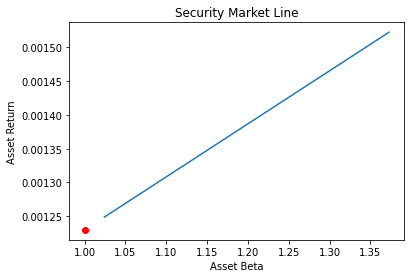

In [76]:
# Calculate asset return and plot Security Market Line
def SML(rf, betas, ret):
    asset_ret = [rf + (rm-rf)*i for i in betas]
    plt.plot(betas, asset_ret)
    plt.xlabel('Asset Beta')
    plt.ylabel('Asset Return')
    plt.title('Security Market Line')
    plt.plot(1, ret, 'ro')

# Get beta coefficients of stocks, return mean, risk free mean
betas = [capm_result_amzn.params[0],capm_result_googl.params[0]]
rm = returns['GSPC'].mean()
risk_free_rate = risk_free.mean()

# Plot SML
SML(risk_free_rate, betas, rm)

Given the beta, if the stock return locates below the SML, this implies that stock has a higher return per unit of risk assumed. Hence, it can be concluded that the stock is overvalued and decide to sell the stock. 
<br>Conversely, if the stock locates above the SML, stock has a lower return per unit of risk assumed, which is considered to be undervalued and buying a stock would be wise choice.

## Check stocks value with SML

In [77]:
# Assume Amazon and Google return expectation 0.045% and 0.05% respectively
ret_exp = [0.0045, 0.005]
df_ret_exp = pd.DataFrame(ret_exp)
df_betas = pd.DataFrame(betas)
df_all = pd.concat([df_betas, df_ret_exp], axis=1)
df_all.columns = ['betas', 'ret_exp']
df_all.index = returns.columns[:2]
df_all

,betas,ret_exp
AMZN,1.024267,0.0045
GOOGL,1.372530,0.0050


In [78]:
# Check overvalued/undervalued
def check_value(rf, rm, stock):
    x = rf + (rm - rf)*df_all['betas'].loc[stock]
    y = df_all['ret_exp'].loc[stock]
    if x < y:
        print(f'The stock {stock} is undervalued')
    elif x > y:
        print(f'The stock {stock} is overvalued')
    else:
        print(f'The stock {stock} is fairly priced')

check_value(risk_free_rate, rm, "AMZN")
check_value(risk_free_rate, rm, "GOOGL")

The stock AMZN is undervalued
The stock GOOGL is undervalued


# Sharpe and Treynor Ratios

## Sharpe ratio

In [79]:
# Calculate Sharpe ratio
def sharpe(stocks, rf, n_assets):
    sharpe_ratios = {}
    for i ,j in zip(stocks, range(n_assets)):
        sharpe_ratios[i] = round((returns.iloc[:, j].mean() - rf)/np.std(returns.iloc[:,j]), 3)
    return sharpe_ratios

n_assets = 2
sharpe_ratios = sharpe(stocks, risk_free_rate, n_assets)
sharpe_ratios

{'AMZN': -0.001, 'GOOGL': 0.169}

In [80]:
# Get max Sharpe ratio
print(max(sharpe_ratios, key=sharpe_ratios.get)) 
print(max(sharpe_ratios.values()))

GOOGL
0.169


Sharpe ratio consider the total risk and fits well if portfolio is not well diversed
<br>The higher the Sharpe ratio is, the higher the return we gain per risk is. Here Google is the highest stock with Sharpe ratio 0.169.
<br>Lowest Sharpe ratio of Amazon indicates higher risk per return in relative to other stocks

## Treynor ratio

In [81]:
# Calculate Treynor ratio
stocks = returns.columns[:2]
def treynor(stocks, rf, n_assets): 
    treynor_ratios = {}
    for i, stock in enumerate(stocks):
        treynor_ratios[stock] = round((returns.iloc[:, i].mean() - rf) / df_all['betas'][stock], 3)
    return treynor_ratios

treynor_ratios = treynor(stocks, risk_free_rate, n_assets)
treynor_ratios

{'AMZN': -0.0, 'GOOGL': 0.002}

In [82]:
# Get min Treynor ratio
print(min(treynor_ratios, key=treynor_ratios.get)) 
print(min(treynor_ratios.values()))

AMZN
-0.0


Treynor ratio takes systematic risk and it is good for well diversified portfolio.
<br>Amazon has the least feasible stock